# DIABOLO


In [1]:
allure_etudier=1



In [2]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
#from  pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)

import pandas as pd
import numpy as np

import platform
import sys

import sklearn


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn import svm, datasets

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.externals import joblib
from sklearn.model_selection import RandomizedSearchCV
import scipy
from scipy.stats import randint as sp_randint


from treeinterpreter import treeinterpreter as ti

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from itertools import *

import graphviz as gv

import pydotplus
import io
from scipy import misc
import time


# environnement

In [3]:
print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)
print('scipy version is.......', scipy.__version__)


Operating system version.... Windows-10-10.0.16299-SP0
Python version is........... 3.6.3
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.13.3
matplotlib version is....... 2.1.2
scipy version is....... 1.0.0


In [4]:
# Creating bins for the win column
def assign_selection(W):
    
    if W >=1 and W <=3:
        return 1
    if W >3:
        return 0
    

In [5]:



def CorrelationDesVariable(df_gagnant):
    
    fig2, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=0.5, ax=ax)
    plt.show()
    
    #--------------------------SEPARATION DES DONNES------------------------------
def split_dataset(dataset, train_percentage, feature_headers, target_header):

    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers],  dataset[target_header],
                                                        train_size=train_percentage, random_state=42)
     # Train and Test dataset size details
    print("--------------------------------")    
    print ("Train_x Shape :: ", train_x.shape)    
    print ("Train_y Shape :: ", train_y.shape)
    print ("Test_x Shape :: ", test_x.shape)    
    print ("Test_y Shape :: ", test_y.shape)
    print("--------------------------------")
    
    
    return train_x, test_x, train_y, test_y



#--------------------------------------------------------------------------------------
def lecture_data(Fichier, xnames, xindex_col):
    
                    df=pd.read_csv (Fichier,
                                       index_col=xindex_col, 
                                       sep=';',
                                       names=xnames,skipinitialspace=True,
                                       encoding='Latin-1' )
                        
       
                    #Suppression de la collone TROT
                    df.drop(["FIN_ligne"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["PAR_NP"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                 #   df.drop(["PAR_COTEDER"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["cendre"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    ##df.drop(["autostart"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["grande_piste"], axis=1, inplace=True)
                    df.drop(["CO_DISTANCE"], axis=1, inplace=True)
                    df.drop(["musique"], axis=1, inplace=True)
                    
                    #df.drop(["PAR_CLASSE_AGE"], axis=1, inplace=True)
                    #df.drop(["PAR_ENT_ECART_GAGNANT"], axis=1, inplace=True)
                   # df.drop(["PAR_ENT_RAPPORT_GAGNANT_M"], axis=1, inplace=True)
                    #df.drop(["PAR_ENT_VICTOIRE"], axis=1, inplace=True)
                    #df.drop(["PAR_GAIN"], axis=1, inplace=True)
                    
                    #df.drop(["PAR_CARRIERE_Q"], axis=1, inplace=True)
                    #df.drop(["PAR_ENT_REU_PLACE"], axis=1, inplace=True)
                    #df.drop(["PAR_ENT_REUSSITE_GAGNE"], axis=1, inplace=True)
                    
                   # df.drop(["pAR_JOC_ECART_GAGNANT"], axis=1, inplace=True)
                    #df.drop(["PAR_JOC_ECART_PLACE"], axis=1, inplace=True)
                    #df.drop(["PAR_JOC_NB_COURSE"], axis=1, inplace=True)
                    #df.drop(["CO_PRIX"], axis=1, inplace=True)
                    #df.drop(["PAR_CARRIERE"], axis=1, inplace=True)
                    #df.drop(["PAR_CARRIERE_Q"], axis=1, inplace=True)
                   # df.drop(["pAR_JOC_RAPPORT_GAGNANT_M"], axis=1, inplace=True)
                
                    df.drop(["PAR_COTEDER"], axis=1, inplace=True)
                    #df.drop(["Nb_partant"], axis=1, inplace=True)
                    df.drop(["autostart"], axis=1, inplace=True)







                    return df 



    

In [6]:
def my_drop(df,col):
    if col in df:
        df.drop([col], axis=1, inplace=True)
    return df    

In [7]:
#from sklearn.preprocessing import StandardScaler
#mms=StandardScaler()
#train_x=mms.fit_transform(train_x)
#test_x=mms.transform(test_x)


In [8]:
# Définir une classe TIme au temps d'exécution total de l'ordinateur
class Timer:
  def __init__(self):
    self.start = time.time()

  def restart(self):
    self.start = time.time()

  def get_time(self):
    end = time.time()
    m, s = divmod(end - self.start, 60)
    h, m = divmod(m, 60)
    time_str = "%02d:%02d:%02d" % (h, m, s)
    return time_str


In [9]:
# Utility function to report best scores
def report(results, n_top=20):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
          
            print("")            

In [10]:
#Définir une méthode pour imprimer la matrice de confusion et les indicateurs de performance
def Print_confusion_matrix(cm, auc, heading):
    print('\n', heading)
    print(cm)
    true_negative  = cm[0,0]
    true_positive  = cm[1,1]
    false_negative = cm[1,0]
    false_positive = cm[0,1]
    total = true_negative + true_positive + false_negative + false_positive
    accuracy = (true_positive + true_negative)/total
    precision = (true_positive)/(true_positive + false_positive)
    recall = (true_positive)/(true_positive + false_negative)
    misclassification_rate = (false_positive + false_negative)/total
    F1 = (2*true_positive)/(2*true_positive + false_positive + false_negative)
    print('accuracy.................%7.4f' % accuracy)
    print('precision................%7.4f' % precision)
    print('recall...................%7.4f' % recall)
    print('F1.......................%7.4f' % F1)
    print('auc......................%7.4f' % auc)

In [11]:
#Définir une fonction d'utilité pour signaler les meilleurs scores
def Report_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [12]:
#Définir une méthode pour tracer l'importance du prédicteur
def Plot_predictor_importance(best_model, feature_columns):
    feature_importance = best_model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    y_pos  = np.arange(sorted_idx.shape[0]) + .5
    fig, ax = plt.subplots()
    ax.barh(y_pos, 
            feature_importance[sorted_idx], 
            align='center', 
            color='green', 
            ecolor='black', 
            height=0.5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feature_columns)
    ax.invert_yaxis()
    ax.set_xlabel('Relative Importance')
    ax.set_title('Predictor Importance')
    plt.show()

In [13]:
# hyper parametres + Construction de l'estimateur + RandomizedSearchCV

In [14]:
def my_randomize_estimateur(estimateur, nb_iteration):

    if (estimateur==RandomForestClassifier):
            param_dist = {"n_estimators": range(20, 100, 2),
                
                  "min_samples_leaf": range(50, 2500, 2),
                  "max_features": [None, 2,3, 4,5, 6,7, 8, 9,10,11, 12,13, 14],
                  "min_samples_split": sp_randint(2, 2000),
                  "bootstrap": [True, False],
                  "criterion": ["gini", "entropy"]}   
            
            clf=RandomForestClassifier(class_weight = 'balanced')
            
            estimator=RandomizedSearchCV(clf,
                                   param_distributions = param_dist,
                                   n_iter = nb_iteration,
                                   scoring = 'roc_auc',
                                   verbose = 2,
                                   n_jobs = 1)    

    if (estimateur==GradientBoostingClassifier):
            param_dist = {"loss": ["deviance", "exponential"],
            "min_samples_split": [1000,1500,2000,2500,3500,4000],
            "min_samples_leaf": range(50, 2500, 2),
            "min_weight_fraction_leaf" : [0.10,0.20,0.30,0.40],            
            "max_depth":[3,5,8,10,13,15,18, 20,25],
            "max_features": [None,0.10,0.20,0.30,0.40,0.50,0.60,0.70],            
            "criterion": ["friedman_mse", "mse"]}
                # CONSTRUCTION DU CLASSIFICATEUR
                
            clf = GradientBoostingClassifier()                                
            
            estimator=RandomizedSearchCV(clf, param_distributions = param_dist, 
                                         scoring = 'roc_auc', verbose = 1,
                                         n_iter = nb_iteration, n_jobs = 1)    
            
            
    return estimator

    

In [15]:
def my_split(taille_entrainement):
  
    
    train_x, test_x, train_y, test_y = split_dataset(df_gagnant, taille_entrainement, feature_columns, response_column)    
    return  train_x, test_x, train_y, test_y     


In [16]:
def calul_data_allure(allure_etudier):
    global df_gagnant,n_features,feature_columns,response_column
    
    #lecture des données
    xnames=['ALLURE'
                    ,'CO_DISTANCE',
                    'CO_PRIX',
                    'IDCOURSE',
                    'IDPARTCIPANT',
                    'PAR_ARRIVE',
                    'PAR_CARRIERE',
                    'PAR_CARRIERE_Q' ,
                    'PAR_CLASSE_AGE',
                    'PAR_COTEDER',
                    'PAR_ENT_ECART_GAGNANT',
                    'PAR_ENT_RAPPORT_GAGNANT_M',
                    'PAR_ENT_REU_PLACE',
                    'PAR_ENT_REUSSITE_GAGNE',
                    'PAR_ENT_VICTOIRE',
                    'PAR_GAIN',
                    'pAR_JOC_ECART_GAGNANT',
                    'PAR_JOC_ECART_PLACE',
                    'PAR_JOC_NB_COURSE',
                    'PAR_JOC_PLACE_3P',
                    'pAR_JOC_RAPPORT_GAGNANT_M',
                    'PAR_JOC_REU_PLACE',
                    'pAR_JOC_REUSSITE_GAGNE',
                    'pAR_JOC_VICTOIRE',
                    'PAR_NP',
                    'PAR_NUM',
                    'PAR_PLACE',
                    'PAR_PLACE_Q',
                    'PAR_REUSSITE_3P',
                    'PAR_REUSSITE_GAGNE',
                    'PAR_REUSSITE_QUINTE',
                    'PAR_RUESSITE_PLACE',
                    'autostart',
                    'cendre',
                    'grande_piste',
                    'Point',
                    'Nb_partant','musique','FIN_ligne']
    
    df=lecture_data('d:\diabollo_al_1.csv',xnames,['IDPARTCIPANT','IDCOURSE','PAR_NUM'])
    
    # groupage par allure
    df=df.groupby("ALLURE")     
    df=df.get_group(allure_etudier)
    df.head()
    df=my_drop(df,'ALLURE')
    # Shape des données
    print(" df ",df.shape)
    print("")
    # Contruction de df_gagant
    df_gagnant = df
    
    # les lignes sans GAIN sont éliminées
    df_gagnant=df_gagnant[df_gagnant.PAR_GAIN >1000] # On garde les lignes avec GAIN
    df_gagnant=df_gagnant[df_gagnant.PAR_GAIN <900000] # On garde les lignes avec GAIN
    
    #les lignes sans arrivée n'apportent rien !!!!
    df_gagnant=df_gagnant[df_gagnant.PAR_ARRIVE>0] # On garde la ligne qui possede information arrivée        
    
    # Shape des données df_gagant
    print(" df_gagnant ",df_gagnant.shape)
    print("Features")
    print("")
    COLUM=df_gagnant.columns
    print(COLUM)
    
    #Construction de la cible
    df_gagnant['SELECTION'] = df_gagnant['PAR_ARRIVE'].apply(assign_selection)
    
    #Suppression de la colonne qui a permis de construire la cible : PAR_ARRIVE
    df_gagnant_len=len(df_gagnant)
    df_gagnant.drop(["PAR_ARRIVE"], axis=1, inplace=True)
    print("df_gagnant",df_gagnant.shape) # description de l'ensemble
    print("")
    # DECSCRIPTION  ************
    # FEATURE
    # CIBLE
    #pd.DataFrame.hist(df_gagnant, figsize = [15,15]);
    
    df_gagnant_len=len(df_gagnant.columns)-1
    
    Lib_features = list(df_gagnant.columns[:df_gagnant_len]) # Liebllé des variable DATA
    #feature_columns=["Point","PAR_RUESSITE_PLACE","PAR_REUSSITE_QUINTE","PAR_ENT_REUSSITE_GAGNE","PAR_REUSSITE_3P","PAR_PLACE_Q","PAR_PLACE","pAR_JOC_VICTOIRE"]
    feature_columns = Lib_features
    print("FEATURES :  ",Lib_features," <<<<************")
    print("")
    
    #---------------------------------------------------
    n_features =len(feature_columns)
    print("NOMBRE DE FEATURE :",n_features)
    
    #---------------------------------------------------
    
    response_column = ['SELECTION']
    
    print("Colonne cible :",response_column)
    print("C'est la donnée a predire")
    
    
    return df_gagnant

    


In [17]:
def courbe_de_roc(model, test_x,test_y):
    from sklearn.metrics import roc_curve, auc

    probas = model.predict_proba(test_x)
    # probas est une matrice de deux colonnes avec la proabilités d'appartenance à chaque classe

    fpr, tpr, thresholds = roc_curve(test_y['SELECTION'], probas[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
        
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")

In [19]:
def my_fit(estimateur, nb_iter, my_nb_splits, my_test_size, my_random_state,train_x,train_y):
    estimator=my_randomize_estimateur(estimateur,nb_iter)
    #fit = estimator.fit(train_x,train_y["SELECTION"].ravel(),sample_weight=np.ones(len(train_y)))
    fit = estimator.fit(train_x,train_y["SELECTION"].ravel())
    
    #cross validation
    # ITERATEUR DE VALIDATION CROISE
    cv_ = ShuffleSplit(n_splits = my_nb_splits, test_size = my_test_size, random_state = my_random_state)
    
    
    Report_scores(estimator.cv_results_, n_top = 3)
    
    best_model = estimator.best_estimator_
    
    print('\nbest_model:\n', best_model)
    print('\nbest_model Nombre de Feature: ', best_model.n_features_)
    #print('best_model  Nombre de sorties : ', best_model.n_outputs_)
    print('best_model  Classes : ', best_model.classes_)
    print('\nbest_model  importance des features : ', best_model.feature_importances_)
    print("")
    print("IMPORTANCE DES CRITERES **********************")
    Plot_predictor_importance(best_model, feature_columns)
    
    
    return best_model

    
    
 

In [27]:
def evaluation(mybest_model,train_x, test_x, train_y, test_y):
    print(" EVALUATION********TRAINING Set*********")
    y_predicted = mybest_model.predict(train_x)
    probabilities = mybest_model.predict_proba(train_x)
    c_report = classification_report(train_y, y_predicted)
    print('\nClassification report TRAINING:\n', c_report)
    
    print("\n EVALUATION*******TEST Set*********")
    y_predicted = mybest_model.predict(test_x)
    probabilities = mybest_model.predict_proba(test_x)
    c_report = classification_report(test_y, y_predicted)
    print('\nClassification report TEST:\n', c_report)
    
    
    auc = roc_auc_score(test_y, y_predicted)
    print("roc_auc_score :  ",auc)    
    cm = confusion_matrix(test_y, y_predicted.ravel())
    print("")
    Print_confusion_matrix(cm, auc, 'Confusion matrics of the TEST dataset')
    
    print("Confusion matrix\n")
    
    #print("CM",cm)
    #from sklearn.metrics import confusion_matrix
    for x,y in [ (train_x, train_y), (test_x, test_y) ]:
        yp  = mybest_model.predict(x)
        cm = confusion_matrix(y, yp.ravel())
    #print(cm)
    
    
    
    courbe_de_roc(model=mybest_model,test_x=test_x,test_y=test_y)
    #courbe_de_roc_avec_cross_validation(classifier=mybest_model,train=train_x,test=test_x)
    
    
    import matplotlib.pyplot as plt
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    print("")
    ntotal = len(test_y)
    correct = test_y["SELECTION"].ravel() == y_predicted
    numCorrect = sum(correct)
    percent = round( (100.0*numCorrect)/ntotal, 6)
    print("\n CLASSIFICATION CORRECTE DES DONNEES DE TEST : {0:d}/{1:d} {2:8.3f}%".format(numCorrect, ntotal, percent))
    prediction_score = 100.0*mybest_model.score(test_x, test_y)
    print('Score de RANDOM Forest Prediction Score sur données de test : %8.3f' % prediction_score)
    
    

In [32]:
def entraine_allure(allure,nb_iter):
    global best_model_1,best_model_2,best_model_3
    #definir le dataframe DF_GAGNANT
    # global df_gagnant,n_features,feature_columns,response_column
    # defini dans calcul_allure
    df_gagnant=calul_data_allure(allure_etudier=1)

    #SPLIT des DONNEES
    Taille_training=0.85
    train_x, test_x, train_y, test_y =my_split(Taille_training)

    # FIT
    best_model=my_fit(estimateur=GradientBoostingClassifier,nb_iter=nb_iter,
                             my_nb_splits=40,
                             my_test_size=1-Taille_training,
                             my_random_state=42,train_x=train_x,train_y=train_y)
    
    #Evaluation des set
    print("evaluation des set")
    evaluation(best_model,train_x, test_x, train_y, test_y )
    
    # gestion des modeles par allure
    if allure==1:
        best_model_1=best_model
    if allure==2:
        best_model_2=best_model    
    if allure==3:
        best_model_3=best_model       
        
    return   train_x, test_x, train_y, test_y

    



In [22]:
def construireFichierCSV(allure,best_model):
    #lecture des données a jouer
    xnames=['ALLURE'
                    ,'CO_DISTANCE',
                    'CO_PRIX',
                    'IDCOURSE',
                    'IDPARTCIPANT',
                    'PAR_ARRIVE',
                    'PAR_CARRIERE',
                    'PAR_CARRIERE_Q' ,
                    'PAR_CLASSE_AGE',
                    'PAR_COTEDER',
                    'PAR_ENT_ECART_GAGNANT',
                    'PAR_ENT_RAPPORT_GAGNANT_M',
                    'PAR_ENT_REU_PLACE',
                    'PAR_ENT_REUSSITE_GAGNE',
                    'PAR_ENT_VICTOIRE',
                    'PAR_GAIN',
                    'pAR_JOC_ECART_GAGNANT',
                    'PAR_JOC_ECART_PLACE',
                    'PAR_JOC_NB_COURSE',
                    'PAR_JOC_PLACE_3P',
                    'pAR_JOC_RAPPORT_GAGNANT_M',
                    'PAR_JOC_REU_PLACE',
                    'pAR_JOC_REUSSITE_GAGNE',
                    'pAR_JOC_VICTOIRE',
                    'PAR_NP',
                    'PAR_NUM',
                    'PAR_PLACE',
                    'PAR_PLACE_Q',
                    'PAR_REUSSITE_3P',
                    'PAR_REUSSITE_GAGNE',
                    'PAR_REUSSITE_QUINTE',
                    'PAR_RUESSITE_PLACE',
                    'autostart',
                    'cendre',
                    'grande_piste',
                    'Point',
                    'Nb_partant','musique','FIN_ligne']
    df_numero_a_predire=lecture_data('d:\diabollo_al_1_D.csv',xnames,['IDPARTCIPANT','IDCOURSE','PAR_NUM'])    
    #print(" df_numero_a_predire ",df_numero_a_predire.shape)
    df_numero_a_predire=df_numero_a_predire.groupby("ALLURE") 
    df_numero_a_predire=df_numero_a_predire.get_group(allure) 
    
    #suppression des features inutiles
    df_numero_a_predire=my_drop(df_numero_a_predire,'ALLURE')
    df_numero_a_predire=my_drop(df_numero_a_predire,'PAR_ARRIVE')
    
    #df_numero_a_predire.head()
    
    df_numero_a_predire['SELECTION'] =0
    train_x, test_x, train_y, test_y = split_dataset(df_numero_a_predire, 0, feature_columns, response_column)   
    #sauvegarde
    test_copy = test_x.copy()
    
    
    
    
    y_pred=best_model.predict(test_x)
    
    df_pred = pd.DataFrame.from_dict(y_pred)
    
    #print(df_pred)
    print("PREDICTION COURSES A JOUER")
    print(y_pred)
          
    # UTILISATION DE BEST_MODEL      
    PROBA=best_model.predict_proba(test_x)
    df_proba = pd.DataFrame.from_dict(PROBA)
          
    print("df final=")     
    df_final =pd.concat([df_proba,df_pred], axis=1)
   # print(df_final.head())
     
    test_x = test_copy.copy()     

    test_x=my_drop(test_x,'PAR_CLASSE_AGE')
    test_x=my_drop(test_x,'PAR_ENT_ECART_GAGNANT')
    test_x=my_drop(test_x,'PAR_ENT_RAPPORT_GAGNANT_M')
    test_x=my_drop(test_x,'PAR_ENT_REU_PLACE')
    test_x=my_drop(test_x,'PAR_ENT_REUSSITE_GAGNE')
    test_x=my_drop(test_x,'PAR_ENT_VICTOIRE')
    test_x=my_drop(test_x,'PAR_GAIN')
    test_x=my_drop(test_x,'pAR_JOC_ECART_GAGNANT')
    test_x=my_drop(test_x,'PAR_JOC_ECART_PLACE')
    test_x=my_drop(test_x,'PAR_JOC_NB_COURSE')
    test_x=my_drop(test_x,'PAR_JOC_PLACE_3P')
    test_x=my_drop(test_x,'PAR_REUSSITE_GAGNE')
    test_x=my_drop(test_x,'PAR_REUSSITE_QUINTE')
    test_x=my_drop(test_x,'PAR_RUESSITE_PLACE')
    test_x=my_drop(test_x,'CO_PRIX')
    test_x=my_drop(test_x,'PAR_CARRIERE')
    test_x=my_drop(test_x,'PAR_CARRIERE_Q')
    test_x=my_drop(test_x,'pAR_JOC_RAPPORT_GAGNANT_M')
    test_x=my_drop(test_x,'pAR_JOC_REUSSITE_GAGNE')
    test_x=my_drop(test_x,'pAR_JOC_VICTOIRE')
    test_x=my_drop(test_x,'PAR_PLACE')
    test_x=my_drop(test_x,'PAR_PLACE_Q')
    test_x=my_drop(test_x,'PAR_CLASSE_AGE')
    test_x=my_drop(test_x,'pAR_JOC_VICTOIRE')
    test_x=my_drop(test_x,'PAR_REUSSITE_3P')
    test_x=my_drop(test_x,'PAR_JOC_REU_PLACE')
    test_x=my_drop(test_x,'PAR_COTEDER')
    test_x=my_drop(test_x,'musique')
    test_x=my_drop(test_x,'Nb_partant')
    test_x.head(10)
          
          
    test_x['v0']=0.0
    test_x['v1']=0.0
    test_x['sel']=0
    #test_x     
    cumul=1
    nb_rows=len(df_proba.index)

    for i in range(0,nb_rows):
            n=df_proba[0][i]
            test_x['v0'][i]=n    
            n=df_proba[1][i]
            test_x['v1'][i]=n      
     
    print(test_x.head())
    
    
    if (allure==1):
        test_x.to_csv("d:\py_resultat_trot.csv")  
    
    if (allure==2):
        test_x.to_csv("d:\py_resultat_galop.csv")  
    
    if (allure==3):
        test_x.to_csv("d:\py_resultat_trot_monte.csv")  
    

    
    print("\n\n ALLER DANS APPLICATION DIABOLO ....")
          


    

# --------------------------------- CALCULER

-----------------------TROT-------------------------------------------------
 df  (237401, 27)

 df_gagnant  (206842, 27)
Features

Index(['CO_PRIX', 'PAR_ARRIVE', 'PAR_CARRIERE', 'PAR_CARRIERE_Q',
       'PAR_CLASSE_AGE', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M',
       'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE',
       'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT', 'PAR_JOC_ECART_PLACE',
       'PAR_JOC_NB_COURSE', 'PAR_JOC_PLACE_3P', 'pAR_JOC_RAPPORT_GAGNANT_M',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE',
       'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'Nb_partant'],
      dtype='object')
df_gagnant (206842, 27)

FEATURES :   ['CO_PRIX', 'PAR_CARRIERE', 'PAR_CARRIERE_Q', 'PAR_CLASSE_AGE', 'PAR_ENT_ECART_GAGNANT', 'PAR_ENT_RAPPORT_GAGNANT_M', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_ENT_VICTOIRE', 'PAR_GAIN', 'pAR_JOC_ECART_GAGNANT

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.4min finished


Model with rank: 1
Mean validation score: 0.736 (std: 0.002)
Parameters: {'min_weight_fraction_leaf': 0.1, 'min_samples_split': 2000, 'min_samples_leaf': 170, 'max_features': 0.6, 'max_depth': 10, 'loss': 'exponential', 'criterion': 'friedman_mse'}

Model with rank: 2
Mean validation score: 0.735 (std: 0.002)
Parameters: {'min_weight_fraction_leaf': 0.1, 'min_samples_split': 1500, 'min_samples_leaf': 2474, 'max_features': 0.3, 'max_depth': 8, 'loss': 'deviance', 'criterion': 'mse'}

Model with rank: 3
Mean validation score: 0.720 (std: 0.002)
Parameters: {'min_weight_fraction_leaf': 0.3, 'min_samples_split': 2500, 'min_samples_leaf': 718, 'max_features': 0.5, 'max_depth': 20, 'loss': 'exponential', 'criterion': 'friedman_mse'}


best_model:
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=10,
              max_features=0.6, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None

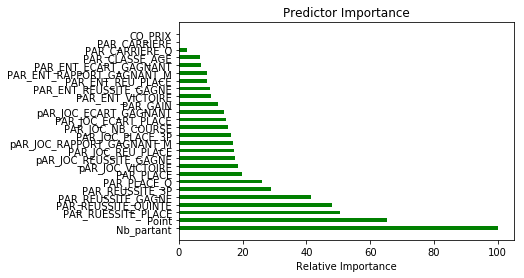

evaluation des set
 EVALUATION********TRAINING Set*********

Classification report TRAINING:
              precision    recall  f1-score   support

          0       0.80      0.97      0.88    137351
          1       0.60      0.15      0.24     38464

avg / total       0.76      0.79      0.74    175815


 EVALUATION*******TEST Set*********

Classification report TEST:
              precision    recall  f1-score   support

          0       0.80      0.97      0.88     24200
          1       0.59      0.15      0.24      6827

avg / total       0.76      0.79      0.74     31027

roc_auc_score :   0.560304406301


 Confusion matrics of the TEST dataset
[[23496   704]
 [ 5805  1022]]
accuracy................. 0.7902
precision................ 0.5921
recall................... 0.1497
F1....................... 0.2390
auc...................... 0.5603
Confusion matrix

Area under the ROC curve : 0.745584


 CLASSIFICATION CORRECTE DES DONNEES DE TEST : 24518/31027   79.021%
Score de RANDO

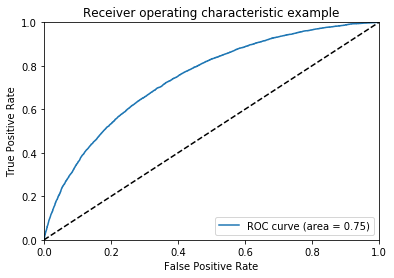

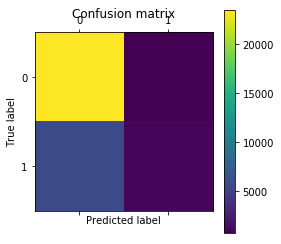

In [28]:
print("-----------------------TROT-------------------------------------------------")
my_timer = Timer()

# creation de best_model_1
train_x, test_x, train_y, test_y=entraine_allure(allure=1,1)

print("-----------------------GALOP-------------------------------------------------")
# creation de best_model_2
#train_x, test_x, train_y, test_y=entraine_allure(allure=2,1)
print("-----------------------MONTE-------------------------------------------------")
# creation de best_model_3
#train_x, test_x, train_y, test_y=entraine_allure(allure=3,1)

elapsed = my_timer.get_time()
print("\nTemps de calcul du FIT MONTE  est : %s" % elapsed)  

In [ ]:
construireFichierCSV(1,best_model_1)

#construireFichierCSV(2,best_model_2)
#construireFichierCSV(3,best_model_3)


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#mms=MinMaxScaler()
#test_x=mms.fit_transform(test_x)
#test_x=mms.transform(test_x)

#from sklearn.preprocessing import StandardScaler
#mms=StandardScaler()
#test_x=mms.fit_transform(test_x)
#test_x=mms.transform(test_x)
